# **Adapting Pre-trained Models for Specific NLP Tasks**

## **Outline**


- Transfer learning and full fine-tuning strategies for LLMs.
- Considerations for costs and potential catastrophic forgetfulness.
- Using Hugging Face's transformers library for fine-tuning
- Single task vs multi task fine tuning
- Retrieval-Augmented Generation (RAG)
- **Hands-on Lab:** Transfer learning and fine tuning


<img src="https://github.com/wsko/Generative_AI/blob/main/Day-3/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

<hr style="border:2px solid blue">

# Transfer Learning and Fine Tuning

- Transfer Learning focuses on reusing the pre-trained model as is, with minimal changes, while Fine-Tuning involves further training to tailor the model to the specific task.
- Transfer learning is typically used for simpler, more general tasks, whereas fine-tuning is preferred for more complex, specific tasks that benefit from additional training.
- Fine-tuning can potentially lead to better performance on the new task but requires more data and computational resources compared to transfer learning.

## **Pretrained vs. Fine-Tuned Models**

- Pretraining
    - Pretraining uses a large corpus of data.
    - Training can take several weeks.

---


![Embedding Classifier Example](https://github.com/wsko/Generative_AI/blob/main/Day-3/images/NLP7.svg?raw=1)
___
- Fine-Tuning

  - Model Adaptation: Involves taking a pre-trained model and training it further on a new dataset, adjusting the weights of the entire model or a subset of layers to better fit the new task.
  - Task-Specific Customization: Allows for more customization and better performance on the new task since the model can learn more task-specific features by adjusting the existing weights.
  - Resource-Intensive: This process is more time-consuming and computationally demanding compared to transfer learning since it requires additional training on the new data.
___

![Embedding Classifier Example](https://github.com/wsko/Generative_AI/blob/main/Day-3/images/NLP8.svg?raw=1)
___
- Why Not Just Pre-Train a Dedicated, Specialized Model?
  - Fine-tuning leverages knowledge from pretraining.
  - Requires less data, time, and resources.

***
## **Example Scenario: develop a generative AI app to write Patent Applications**
  - Pretrained model on large English text corpora (e.g., GPT-3).
  - Fine-tuning on millions of US Patents.
____

## Catastrophic Forgetfulness

-  **Catastrophic Forgetfulness** occurs when a model forgets previously learned information upon learning new information. In the context of fine-tuning, this means the model might lose its ability to perform well on the original tasks it was pre-trained on after being fine-tuned on a specific task.

- **Considerations:**
   - **Regularization Techniques:** Applying regularization methods such as Elastic Weight Consolidation (EWC) helps the model retain important weights related to previously learned tasks while learning new tasks.
   - **Sequential Fine-Tuning:** Gradually fine-tuning the model on multiple tasks sequentially, rather than all at once, can help mitigate catastrophic forgetting.
   - **Fine-Tuning Duration:** Monitoring the fine-tuning process and avoiding overfitting to the new task is crucial. Fine-tuning for too long on a specific task can lead to forgetting of previously learned information.

## Single-Task vs Multi-Task Fine-Tuning

- **Single-Task Fine-Tuning:**
   - Fine-tunes a model on one specific task (e.g., sentiment analysis) using a dedicated dataset. Provides optimized performance for the targeted task as the model adapts specifically to its requirements.
   - **Limitations:** May not generalize well to other tasks and can lead to overfitting on the single task.

- **Multi-Task Fine-Tuning:**
   - Fine-tunes a model on multiple tasks simultaneously (e.g., sentiment analysis, summarization, translation) using datasets for each task. Enhances the model’s ability to generalize across tasks by sharing knowledge and representations learned from different tasks.
   - **Limitations:** Can be complex to manage and balance task-specific requirements; risk of task interference where learning one task might negatively impact others.

- **Task Interference and Synergy:**
   - **Single-Task:** Task-specific fine-tuning can lead to high performance but may forget previously learned tasks or have limited versatility.
   - **Multi-Task:** Task interference can occur, but it promotes a more versatile model by leveraging shared knowledge, which can improve overall performance and generalization across tasks.

### Retrieval-Augmented Generation (RAG) as an Alternative to Fine-Tuning

- **RAG** combines retrieval and generation to enhance performance. The retrieval component fetches relevant information from a large corpus and a generation component to produce responses based on that information.
- The model first retrieves relevant documents from a pre-defined knowledge base using a retrieval mechanism (e.g., dense retrieval with embeddings), then, it generates responses by conditioning on the retrieved information


# Examples of fine-tuning BERT and GPT:

#### Fine-Tuning BERT:
1. **Sentiment Analysis:**
   - Fine-tune BERT on a dataset like IMDb movie reviews to classify text as positive or negative.
   - The model adapts to understand sentiments specifically within the movie review context.

2. **Question Answering:**
   - Use a dataset such as SQuAD (Stanford Question Answering Dataset) to fine-tune BERT.
   - The model learns to provide precise answers to questions based on a given context paragraph.

3. **Named Entity Recognition (NER):**
   - Fine-tune BERT on a labeled dataset like CoNLL-2003 to identify and classify entities (e.g., names of people, organizations, locations) within text.
   - The model adjusts to recognize entities in the specific format and context of the new dataset.

#### Fine-Tuning GPT:
1. **Text Summarization:**
   - Fine-tune GPT on a dataset of articles paired with their summaries, such as the CNN/Daily Mail dataset.
   - The model learns to generate concise summaries of long articles.

2. **Chatbot Development:**
   - Use a conversational dataset like Persona-Chat to fine-tune GPT.
   - The model adapts to generate more human-like and contextually appropriate responses in a dialogue setting.

3. **Code Generation:**
   - Fine-tune GPT on a dataset of code snippets and their descriptions or related comments, such as GitHub repositories.
   - The model learns to generate code based on textual descriptions or to complete code snippets.


<img src="https://github.com/wsko/Generative_AI/blob/main/Day-3/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

## **Fine Tuning BERT for Text Classification**



### **Step 1: Load Pre-trained BERT**

- Import necessary libraries.
- Load pre-trained BERT tokenizer and model (e.g., `bert-base-uncased`).


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load pre-trained BERT tokenizer and model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # 2 for binary classification


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<img src="https://github.com/wsko/Generative_AI/blob/main/Day-3/images/border.jpg?raw=1" height="10" width="1500" align="center"/>


## **Step 2: Prepare Training Data**

- Define sample training data and labels.
- Tokenize and encode the training data using the BERT tokenizer.

In [ ]:
# Sample training data
# texts = ["This is a positive review.", "This is a negative review."]
# labels = [1, 0]  # 1 for positive, 0 for negative

texts = ["This movie is awful", "This is a negative review.", "Terrible movie, makes me rethink", "Entertaining film"]
labels = [0, 0,0,1]  # 1 for positive, 0 for negative


<img src="https://github.com/wsko/Generative_AI/blob/main/Day-3/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

## **Step 3: Create DataLoader**

- Create a DataLoader for efficient training.
- Set batch size and shuffle the data.

In [ ]:

# Tokenize and encode the training data
input_ids = []
attention_masks = []

for text in texts:
    encoded_text = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors="pt"
    )
    input_ids.append(encoded_text['input_ids'])
    attention_masks.append(encoded_text['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Create a DataLoader for training data
batch_size = 2
train_dataset = TensorDataset(input_ids, attention_masks, labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


<img src="https://github.com/wsko/Generative_AI/blob/main/Day-3/images/border.jpg?raw=1" height="10" width="1500" align="center"/>


## **Step 4: Fine-Tune BERT**

- Set up optimization (e.g., AdamW) and training parameters.
- Iterate through epochs, compute loss, and update model weights.

In [ ]:


# Fine-tuning BERT on the classification task (you can adjust the number of training epochs)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
num_epochs = 3

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, label = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=label)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {average_loss:.4f}")




<img src="https://github.com/wsko/Generative_AI/blob/main/Day-3/images/border.jpg?raw=1" height="10" width="1500" align="center"/>


## **Step 5: Evaluation**

- Switch to evaluation mode.
- Tokenize and encode sample test data.
- Make predictions and calculate classification metrics.

Predicted Labels: tensor([0, 0])
True Labels: [1 0]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Accuracy: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


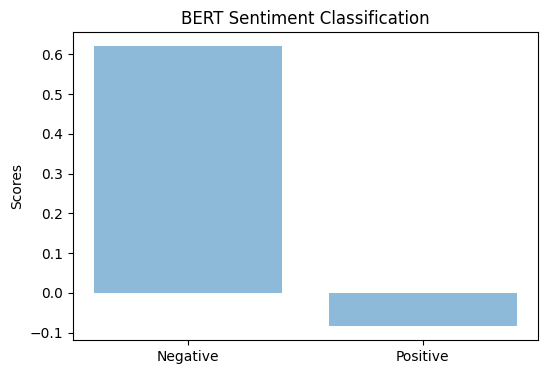

In [ ]:
# Evaluation
model.eval()
test_texts = ["This movie is great.", "I didn't like the film."]
true_labels = [1, 0]

test_input_ids = []
test_attention_masks = []

for text in test_texts:
    encoded_text = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors="pt"
    )
    test_input_ids.append(encoded_text['input_ids'])
    test_attention_masks.append(encoded_text['attention_mask'])

test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
true_labels = torch.tensor(true_labels)

with torch.no_grad():
    logits = model(test_input_ids, attention_mask=test_attention_masks).logits

predicted_labels = np.argmax(logits, axis=1)
print("Predicted Labels:", predicted_labels)
print("True Labels:", true_labels.numpy())

# Classification report and accuracy
classification_rep = classification_report(true_labels.numpy(), predicted_labels)
accuracy = accuracy_score(true_labels.numpy(), predicted_labels)
print("Classification Report:\n", classification_rep)
print("Accuracy:", accuracy)

# Visualization
fig, ax = plt.subplots(figsize=(6, 4))
labels = ['Negative', 'Positive']
y_pos = np.arange(len(labels))
scores = [logits[0][0].item(), logits[1][1].item()]
ax.bar(y_pos, scores, align='center', alpha=0.5)
ax.set_ylabel('Scores')
ax.set_xticks(y_pos)
ax.set_xticklabels(labels)
ax.set_title('BERT Sentiment Classification')
plt.show()

<img src="https://github.com/wsko/Generative_AI/blob/main/Day-3/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

## **OpenAI GPT Models**

### **Using OpenAI's GPT with Hugging Face's Transformers**


**OpenAI's Generative Pretrained Transformer (GPT):**
- A state-of-the-art language model using Transformer architecture.
- Trained on vast amounts of text and can generate human-like text.
- Has multiple versions (e.g., GPT-2, GPT-3) with increasing model sizes and capabilities.

**Hugging Face's Transformers:**
- A popular library for Natural Language Processing.
- Provides pre-trained models, including GPT variants.
- Facilitates easy fine-tuning, usage, and deployment of models.


- https://huggingface.co/docs/transformers/en/model_doc/gpt2

-

<img src="https://github.com/wsko/Generative_AI/blob/main/Day-3/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel


#### **Initializing the tokenizer and model**




In [ ]:
# Load pre-trained GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2-medium")

# Load the pre-trained GPT-2 model
model = GPT2LMHeadModel.from_pretrained("gpt2-medium")

# Ensure the model is in eval mode (important for models with dropout or batchnorm)
model.eval()

# If you have a GPU available, move the model there
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "mps" if torch.backends.mps.is_available() else "cpu"
model.to(device)
print(device)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

cpu


<img src="https://github.com/wsko/Generative_AI/blob/main/Day-3/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

#### **Generate text given a prompt**

To generate text with GPT-2:

In [ ]:
def generate_text(prompt, max_length=100, temperature=1.0):
    # Encode the prompt text to tensor
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

    # Generate text using the model
    with torch.no_grad():
        generated_ids = model.generate(input_ids=input_ids, max_length=max_length, num_return_sequences=1, temperature=temperature)[0]

    # Decode the tensor to a text string
    generated_text = tokenizer.decode(generated_ids, skip_special_tokens=True)
    return generated_text

# Try it out!
prompt = "Once upon a time"
print(generate_text(prompt))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, there was a man who lived in a village called Krakow. He was a very good man, and he was very kind to his children. One day, he was walking along the road, and he saw a woman walking by. He asked her if she was his daughter. She said yes, and she said that she was his daughter. He asked her if she was his wife. She said yes, and she said that she was his wife. He asked her


<img src="https://github.com/wsko/Generative_AI/blob/main/Day-3/images/border.jpg?raw=1" height="10" width="1500" align="center"/>


#### **Adjusting generation parameters**

The `generate()` method provides a lot of parameters to play with to customize the generation process:

- `max_length`: Maximum length of the generated text.
- `temperature`: Controls randomness. Higher values (e.g., 1.0) make generation more random, while lower values (e.g., 0.7) make it more deterministic.
- `num_return_sequences`: Number of independently computed returned sequences. If you want multiple variations of generated text, increase this number.
- ... and many more (refer to the Hugging Face documentation for a detailed list).


<img src="https://github.com/wsko/Generative_AI/blob/main/Day-3/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

#### **6. Using other GPT versions**

Hugging Face's library supports multiple versions of GPT models like `gpt2`, `gpt2-medium`, `gpt2-large`, and `gpt2-xl`. Simply replace the model name in the `from_pretrained()` function to switch between them.


<img src="https://github.com/wsko/Generative_AI/blob/main/Day-3/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

## **Example: Question Answering with GPT-2**

- **Exerecise:** replace the training phrase and questions with your own examples

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2ForQuestionAnswering

# Initialize the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2ForQuestionAnswering.from_pretrained('gpt2')

# Add a padding token to the tokenizer
tokenizer.pad_token = tokenizer.eos_token

# Example context and question
context = "Huggingface's Transformers library provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio."
question = "What does Huggingface's Transformers library provide?"

# Encode the input
inputs = tokenizer(question, context, return_tensors='pt', truncation=True, padding=True)

# Get model outputs
with torch.no_grad():
    outputs = model(**inputs)

# Extract the answer (start and end logits)
start_logits = outputs.start_logits
end_logits = outputs.end_logits

# Find the start and end positions with the highest scores
start_idx = torch.argmax(start_logits)
end_idx = torch.argmax(end_logits)

# Decode the answer
input_ids = inputs['input_ids'][0]
answer = tokenizer.decode(input_ids[start_idx:end_idx+1])

print(f"Question: {question}")
print(f"Answer: {answer}")


Some weights of GPT2ForQuestionAnswering were not initialized from the model checkpoint at gpt2 and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Question: What does Huggingface's Transformers library provide?
Answer:  does Huggingface's Transformers library provide?Huggingface's Transformers library provides thousands of pretrained models to


<img src="https://github.com/wsko/Generative_AI/blob/main/Day-3/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

# **Lab:** Fine-Tuning BERT for the Finance Sentiment Dataset

- Modify the demo example to perform training on the Finance Sentiment data: https://github.com/wsko/Statistics/raw/main/finance_sentiment.csv

- Adjust batch size, number of epochs and other hyperparameters

- Be mindful of Colab resource limitation: start with a small subset of the training data (10-20 examples)


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load pre-trained BERT tokenizer and model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # 2 for binary classification


In [ ]:
import pandas as pd
df = pd.read_csv("https://github.com/wsko/Statistics/raw/main/finance_sentiment.csv", encoding='latin-1')


texts = list(df['text'].values)[:1000]
labels = list(df['label'].values)[:1000]

for i in range(10):
  print(texts[i], '\n', labels[i])


Its market share widened to 48.51 percent from 48.31 percent a year earlier . 
 1
In Q1 of 2009 , the company 's result before taxes from continuing operations , excluding non-recurring items , totalled EUR -0.4 mn , compared to EUR -0.1 mn in the corresponding period in 2008 . 
 0
The pretax profit of the group 's life insurance business increased to EUR 36 million from EUR 27 million . 
 1
Finnish airline Finnair is starting the temporary layoffs of cabin crews in February 2010 . 
 0
Stora Enso Oyj said its second-quarter result would fall by half compared with the same period in 2007 . 
 0
Changes in the market situation and tougher price competition have substantially reduced demand for bread packaging manufactured at the Kauhava plant , according to the company . 
 0
The dismissed staff members will now take the matter to court unless it can be settled outside . 
 0
Viking Line head Jan Kaarstroem told TT that his company 's ferries were well equipped to handle ice and that all th

In [ ]:

# Tokenize and encode the training data
input_ids = []
attention_masks = []

for text in texts:
    encoded_text = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors="pt"
    )
    input_ids.append(encoded_text['input_ids'])
    attention_masks.append(encoded_text['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Create a DataLoader for training data
batch_size = 10
train_dataset = TensorDataset(input_ids, attention_masks, labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
# Fine-tuning BERT on the classification task (you can adjust the number of training epochs)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
num_epochs = 3

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, label = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=label)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {average_loss:.4f}")




In [ ]:
# Evaluation
model.eval()
test_texts = list(df['text'].values)[1001:1050]
true_labels = list(df['label'].values)[1001:1050]


test_input_ids = []
test_attention_masks = []

for text in test_texts:
    encoded_text = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors="pt"
    )
    test_input_ids.append(encoded_text['input_ids'])
    test_attention_masks.append(encoded_text['attention_mask'])

test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
true_labels = torch.tensor(true_labels)

with torch.no_grad():
    logits = model(test_input_ids, attention_mask=test_attention_masks).logits

predicted_labels = np.argmax(logits, axis=1)
print("Predicted Labels:", predicted_labels)
print("True Labels:", true_labels.numpy())

# Classification report and accuracy
classification_rep = classification_report(true_labels.numpy(), predicted_labels)
accuracy = accuracy_score(true_labels.numpy(), predicted_labels)
print("Classification Report:\n", classification_rep)
print("Accuracy:", accuracy)

# Visualization
fig, ax = plt.subplots(figsize=(6, 4))
labels = ['Negative', 'Positive']
y_pos = np.arange(len(labels))
scores = [logits[0][0].item(), logits[1][1].item()]
ax.bar(y_pos, scores, align='center', alpha=0.5)
ax.set_ylabel('Scores')
ax.set_xticks(y_pos)
ax.set_xticklabels(labels)
ax.set_title('BERT Sentiment Classification')
plt.show()